# 4TIN811U Machine Learning & Deep Learning
# TP 3 - Modèles linéaires généralisés

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
# Setup plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

# 1. Jouer avec des distributions Gaussiennes multivariées

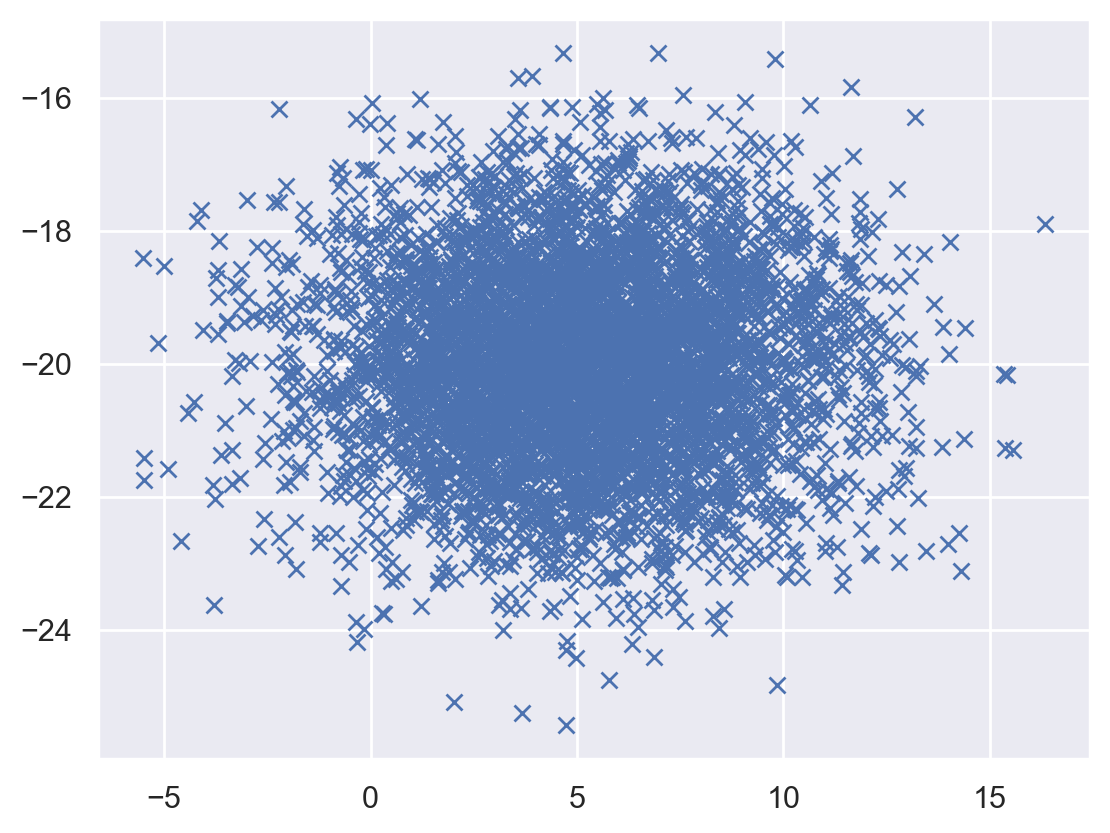

In [3]:
mean = [5, -20]
cov = [[10, 0], [0, 2]] 

X, Y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(X, Y, 'x')
plt.show()

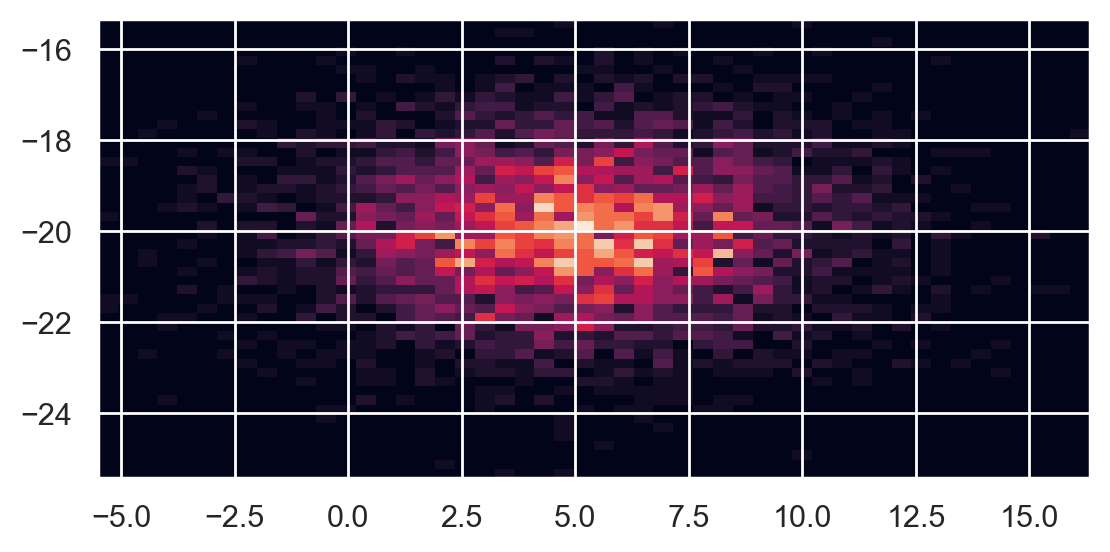

In [4]:
# Heatmap de la gaussienne
heatmap, xedges, yedges = np.histogram2d(X, Y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower')

Modifiez les paramètres `mean` et `cov` et regardez leur influence sur les figures obtenues.

# 2. Classification

On commence par deux fonctions qu'on va utiliser pour afficher les données (pas besoin de comprendre leur fonctionnement en détail).

In [5]:
# Useful functions to plot the data and classifier.

def plot_data(x, y):
    """Plot some 2D data"""

    fig, ax = plt.subplots()
    scatter = ax.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
    ax.add_artist(legend1)
    plt.xlim((min(x[:, 0]) - 0.1, max(x[:, 0]) + 0.1))
    plt.ylim((min(x[:, 1]) - 0.1, max(x[:, 1]) + 0.1))


def plot_decision_boundary(pred_func, x, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)

## 2.1. Avec Scikit-learn

On génére des données en deux dimensions (on a donc $n=2$ features), séparée en deux classes.

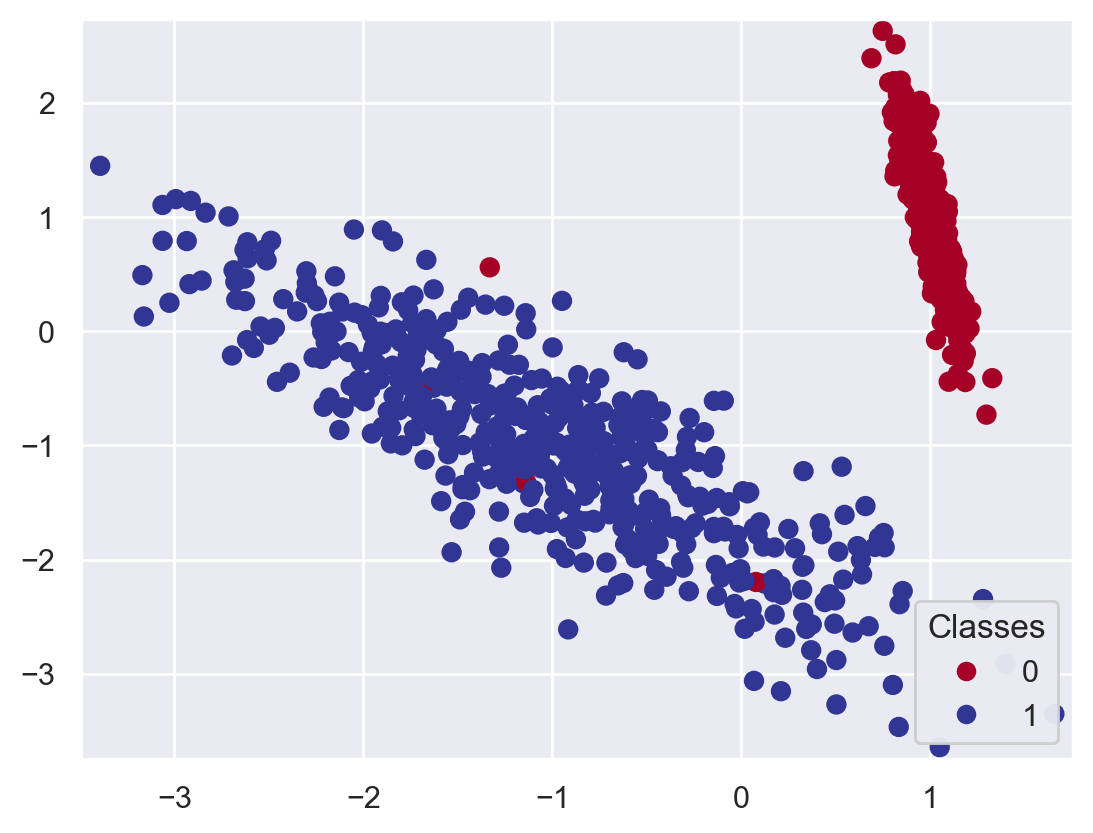

In [6]:
import sklearn
from sklearn.datasets import make_classification

# Generate 2 classes of linearly separable data
X, Y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
)
plot_data(X, Y)

À l'aide de `sklearn.linear_model.LogisticRegression`, faire une régression logistique sur les données. Afficher les paramètres $\Theta$ et le $r^2$.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

lr_model = LogisticRegression().fit(X, Y)
preds = lr_model.predict(X)

print("Coefficients (Theta):", lr_model.coef_)
print("biais:", lr_model.intercept_)
print( r2_score(Y, preds) )

Coefficients (Theta): [[-2.51711626 -2.33829345]]
biais: [0.00068668]
0.963999855999424


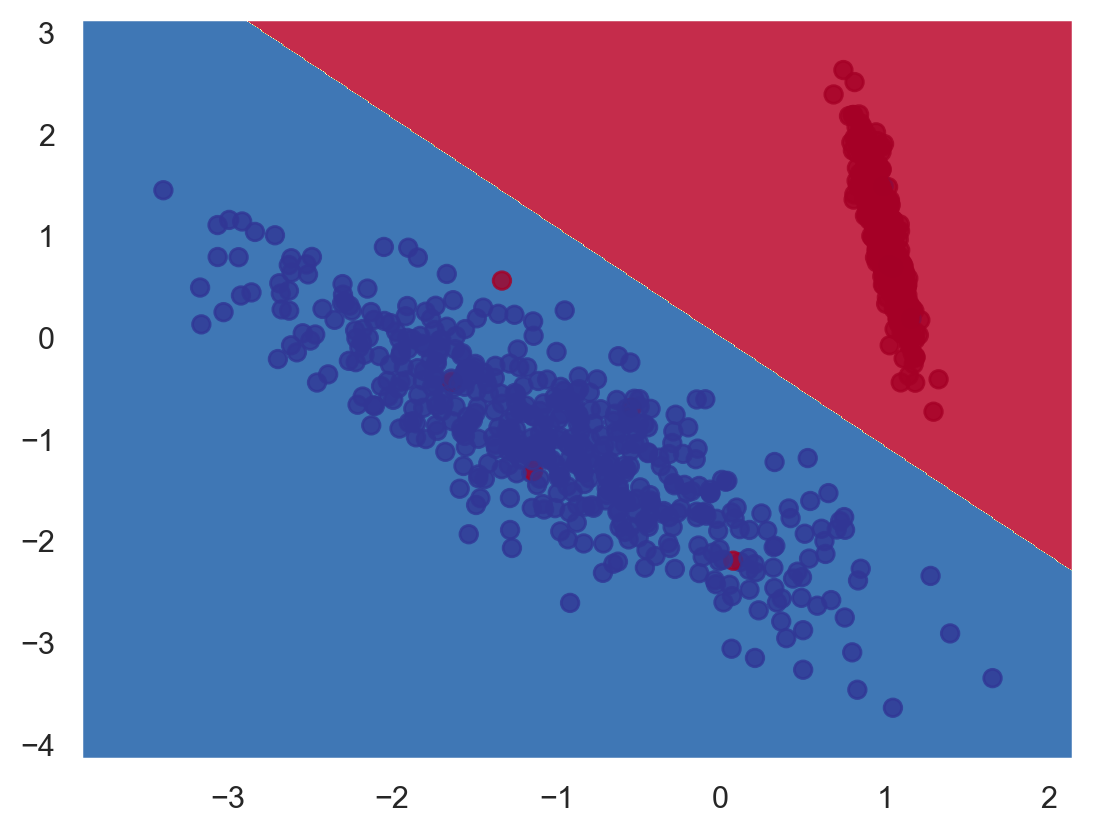

In [8]:
# Pour afficher le classifieur et les données
plot_decision_boundary(lambda x: lr_model.predict(x), X, Y)

Même question, mais en utilisant `sklearn.linear_model.SGDClassifier`.

Coefficients (Theta): [[-2.51711626 -2.33829345]]
biais: [0.00068668]
0.963999855999424


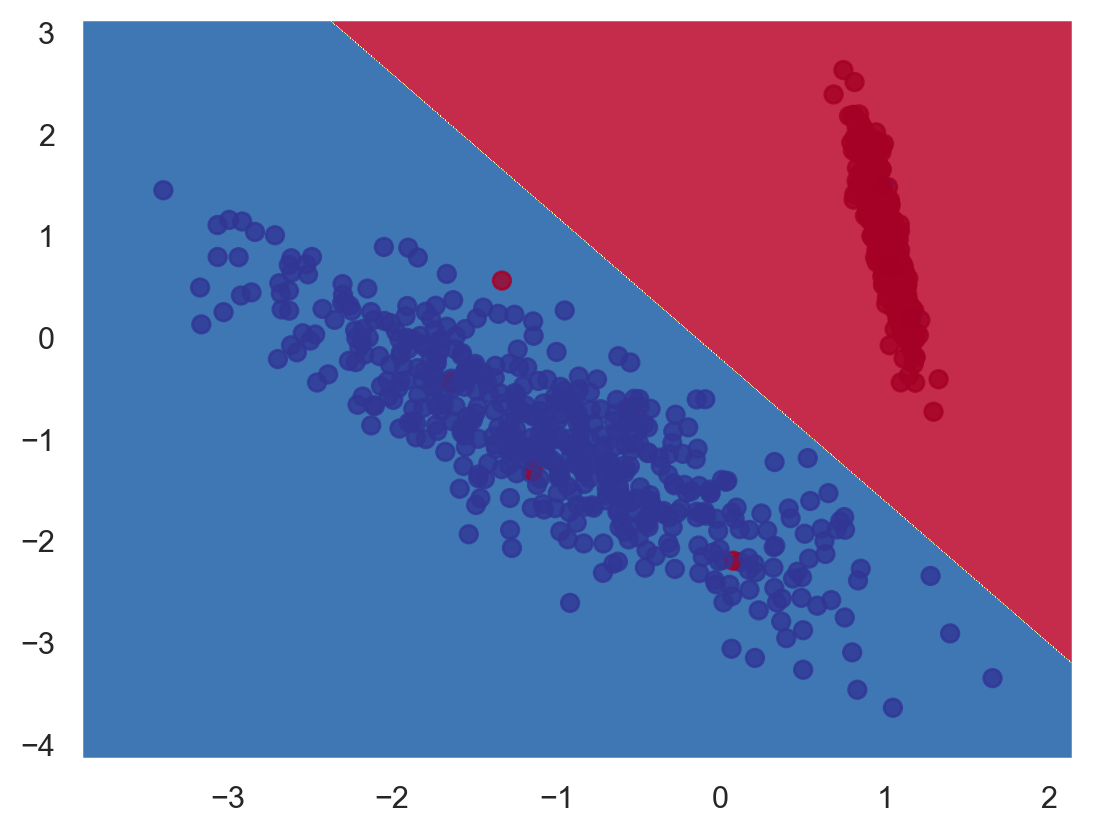

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier().fit(X, Y)
preds = sgd_model.predict(X)
print("Coefficients (Theta):", lr_model.coef_)
print("biais:", lr_model.intercept_)
print( r2_score(Y, preds) )

plot_decision_boundary(lambda x: sgd_model.predict(x), X, Y)

# 3. Régression de Poisson

## 3.1. Une famille exponentielle

Dans cette partie nous allons étudier un exemple de modèle linéaire généralisé.
On considère la [loi de Poisson](https://fr.wikipedia.org/wiki/Loi_de_Poisson) qui admet comme paramètre canonique $\lambda > 0$ et est définie par
$$ p(k;\lambda) = \frac{\lambda^k}{k!}e^{-\lambda} $$
pour $k \in \mathbb{N}$.
L'espérance et la variance d'une variable aléatoire suivant une loi de Poisson de paramètre $\lambda$ sont toutes deux égales à $\lambda$.

*Questions :*
 1. Montrer que la loi de Poisson est une famille exponentielle en l'écrivant sous la forme
$$p(y;\lambda) = b(y) \exp(\eta^T T(y) - a(\eta)).$$
Quelle est la dépendance entre $\eta$ et $\lambda$ ? Que vaut $a(\eta)$ ? (voir le tableau)

 2. On rappelle qu'étant donné $\Theta \in \mathbb{R}^{(n+1)\times 1}$ et $X \in \mathbb{R}^{m\times (n+1)}$, on pose $\eta := X\Theta$. On rappelle que l'hypothèse associée à une famille exponentielle est
$$ h_{\Theta}(X) = g(X\Theta) \text{ où } g(\eta) = \frac{\partial}{\partial \eta} a(\eta). $$
En déduire une expression de $h_{\Theta}(X)$ qui ne dépend que de $X$ et de $\Theta$.

*Réponse:* TODO
 
 1. Déduire de la question 2 un nom alternatif à "régression de Poisson".
   
*Réponse:* TODO

1. $$ b(y) = 1/(y!) $$
$$\eta^T T(y) = y ln \lambda $$
$$ a(\eta) = \lambda = \exp (\eta)$$

2.$$h_{\Theta}(X) = \exp (x\Theta)$$

1. son autre petit nom est: "régression exponentielle"

Le but de cette partie est de modéliser **l'évolution de la population mondiale** à l'aide d'une régression de Poisson.

## 3.2. Régression à la main

In [33]:
from process_data import get_world_population
data = get_world_population()
# 2D array: first column in the year, second column is the population

Years = data[:, 0:1]
m, n = Years.shape
X = np.concatenate((np.ones((m, 1)), Years), axis=1)
Pop = data[:, 1:2]

print(X.shape)
print(Pop.shape)


(248, 2)
(248, 1)


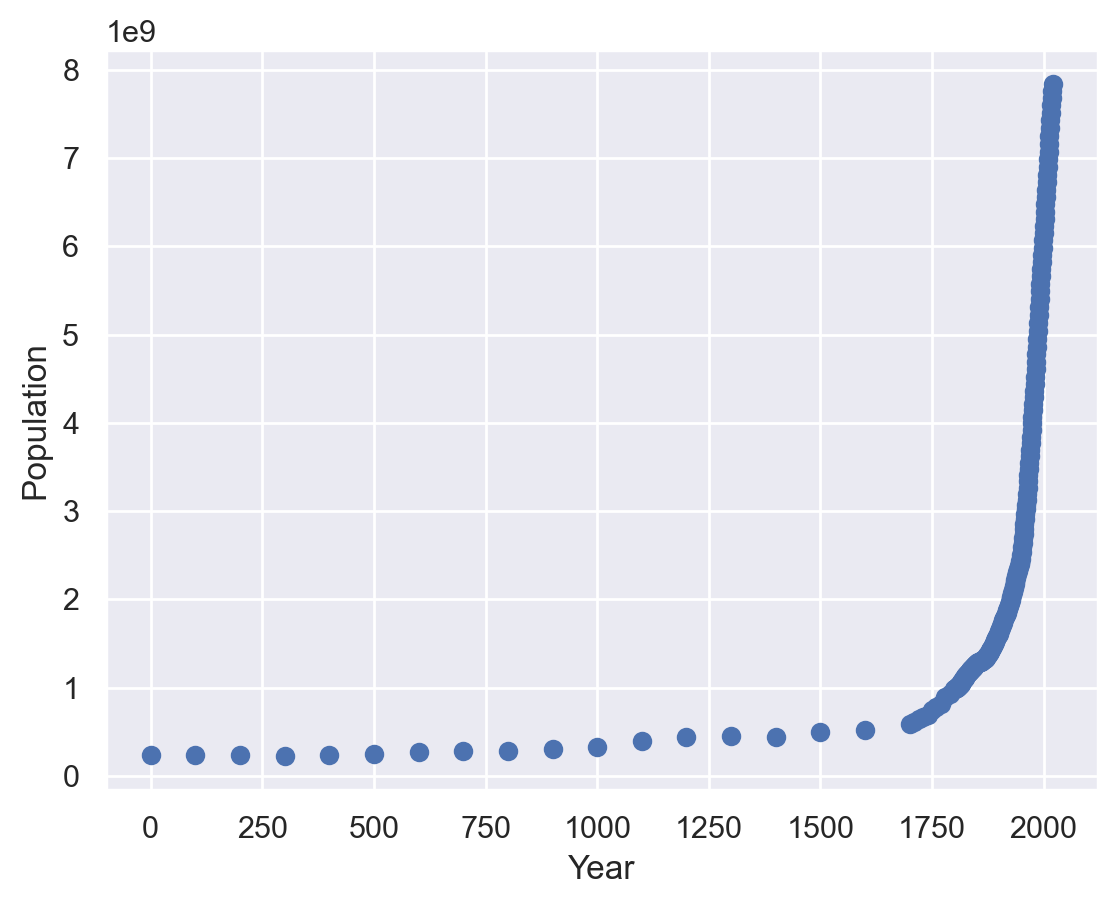

In [34]:
plt.scatter(Years, Pop)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

Modifiez le code ci-dessus pour que l'échelle des $y$ soit logarithmique.

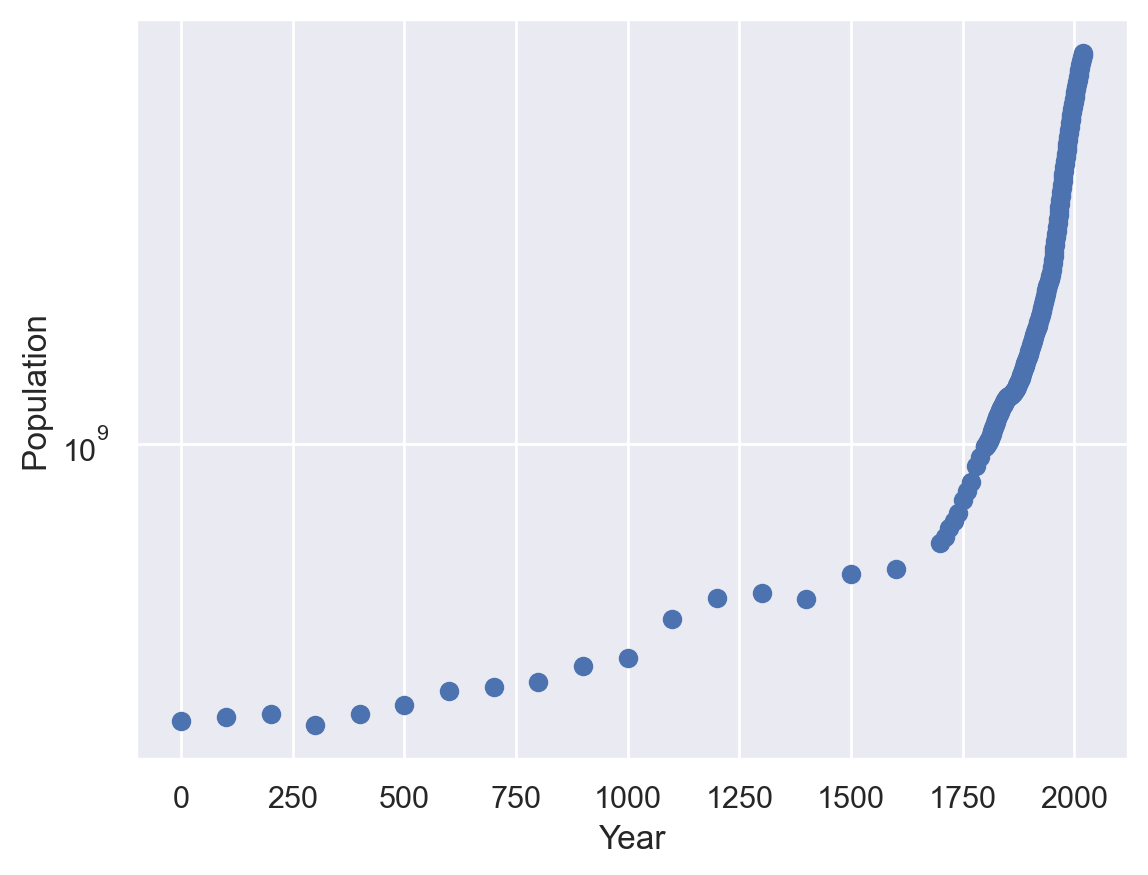

In [35]:
plt.scatter(Years, Pop)
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

En première approximation, l'évolution de la population suit deux phases exponentielles qui ont des paramètres différents. Ona  une première phase où l'évolution est exponentielle mais lente avant 1700, puis une exponentielle avec un plus grand paramètre à partir de 1700.
On va donc se restreindre aux années ≥ 1700.

In [55]:
select = [i for i in range(m) if Years[i] >= 1700]
Years = Years[select]
X = X[select,:]
Pop = Pop[select,:]
print(Years.shape)

m, n = X.shape
n -= 1

print(X.shape)
print(Pop.shape)

(231, 1)
(231, 2)
(231, 1)


En s'inspirant des fonctions pour la régression linéaire multiple (partie 3 du TP 1), écrire les fonctions suivantes.

In [37]:
def poisson_hypothesis(Theta, X):
    """Returns the hypothesis, for parameters Theta, evaluated on X.
    This corresponds to `h_{\Theta}(X))'."""
    return np.exp( X @ Theta)

def poisson_square_error(Theta, X, Y):
    """Returns the square error of Theta on training examples (X, Y)."""
    return 0.5 *(poisson_hypothesis(Theta, X) - Y).T @(poisson_hypothesis(Theta, X) - Y)

def poisson_gradient_square_error(Theta, X, Y):
    """Returns the gradient of the square error on training examples (X, Y). The result is a matrix with the same dimension as Theta."""
    return X.T @ poisson_hypothesis(Theta, X)- X.T@Y

def one_step_poisson_regression_gradient_descent(Theta, X, Y, learning_rate):
    """One step of the gradient descent for the multiple Poisson regression. Takes the parameters, the training examples and the learning rate, and returns the new values for the parameters."""
    gradient = poisson_gradient_square_error(Theta, X, Y)
    return Theta - learning_rate * gradient

def poisson_regression_gradient_descent(X, Y, steps = 1000, learning_rate = .01):
    """Multiple batch gradient descent algorithm to compute a Poisson regression.
    Takes the training examples and the learning rate (0.01 by default) and returns Theta
    Halting condition: when the number of steps is reached."""
    Theta_hist = []
    Theta = np.zeros((X.shape[1], 1))
    for i in range (steps):
        Theta=one_step_poisson_regression_gradient_descent(Theta, X, Y, learning_rate)
        Theta_hist+=[Theta]
    return Theta, Theta_hist

Lancez la régression linéaire. Le but est d'avoir un $r^2$ élevé (disons supérieur à 0.9) : vous pourrez calculer le r^2 avec la fonction `r2_score` de `sklearn.metrics`.

Rappel : l'erreur est proportionnelle au nombre d'exemples ($m$) mais aussi aux valeurs $y$. Il faut prendre ceci en compte pour choisir le learning rate.

Theta:  [[5.84017611e-06]
 [1.12289828e-02]]
r^2:  -1.8137336046777044


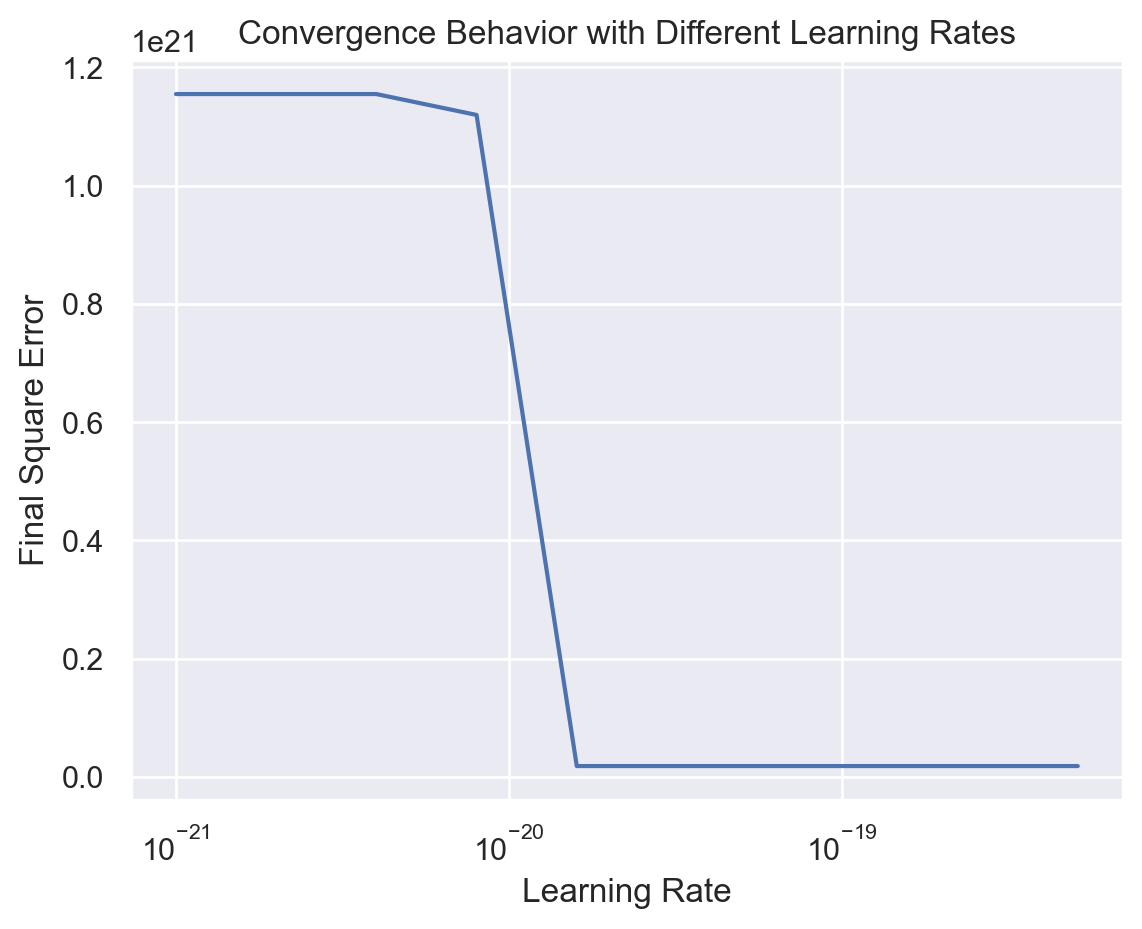

In [38]:
Theta , Theta_hist = poisson_regression_gradient_descent(X, Pop, steps = 1000, learning_rate = 1e-19)
print("Theta: ", Theta)
preds = X @ Theta
print(f"r^2: ", r2_score(Pop, preds))

alpha = 1e-21
alpha_values = []
final_errors = []

while alpha <= 1e-18:
    Theta, _ = poisson_regression_gradient_descent(X, Pop, 1000,learning_rate = alpha )
    errors = poisson_square_error(Theta, X, Pop)[0][0]
    
    alpha_values.append(alpha)
    final_errors.append(errors)

    alpha *= 2

plt.figure()
plt.plot(alpha_values, final_errors)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Final Square Error')
plt.title('Convergence Behavior with Different Learning Rates')
plt.show()

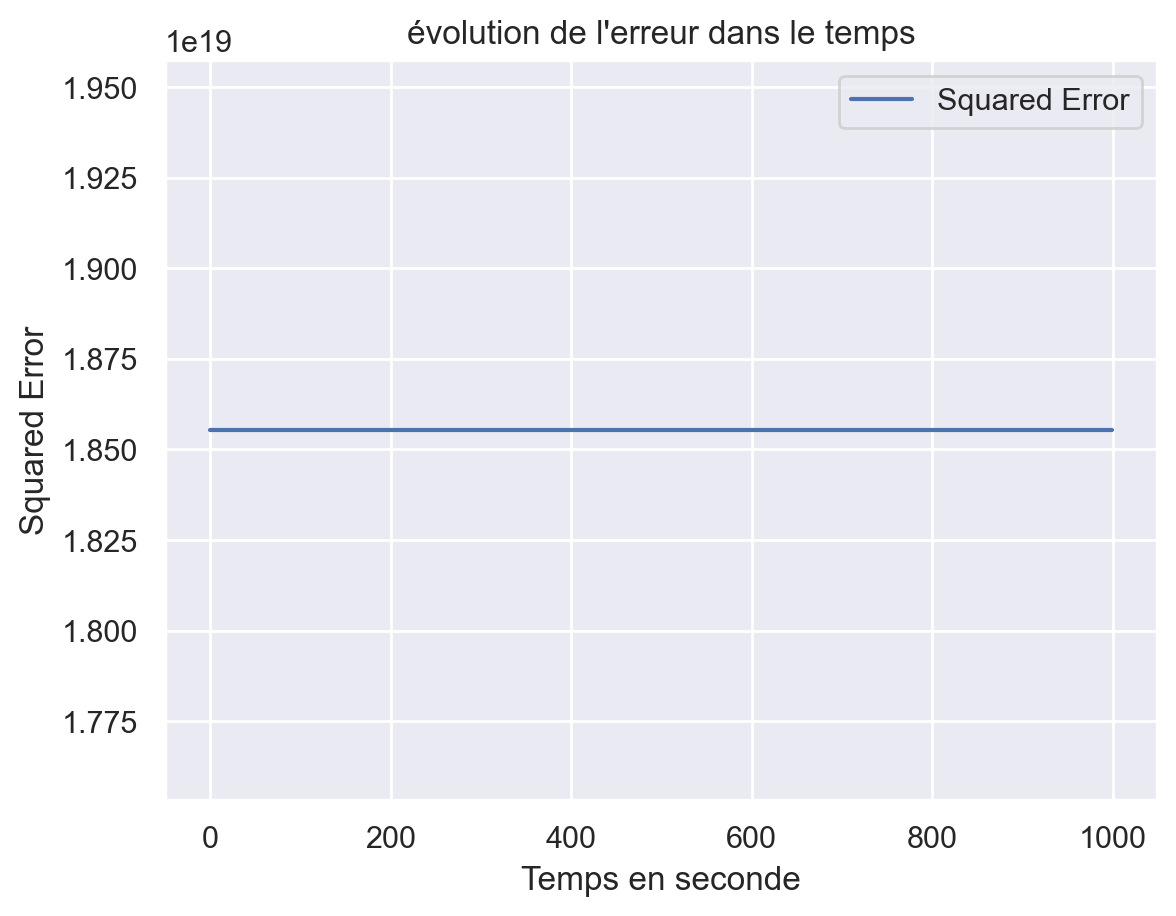

r^2:  0.9547951144346889


In [39]:
from sklearn.metrics import r2_score


Theta , Theta_hist = poisson_regression_gradient_descent(X, Pop, steps = 1000, learning_rate = 1e-19)


errors = [poisson_square_error(Theta, X, Pop)[0][0] for theta in Theta_hist]

plt.figure()
plt.plot( errors, label='Squared Error')
plt.xlabel('Temps en seconde')
plt.ylabel('Squared Error')
plt.legend()
plt.title('évolution de l\'erreur dans le temps')
plt.show()

preds = poisson_hypothesis(Theta, X)


print(f"r^2: ", r2_score(Pop, preds))



Afficher (avec une échelle linéaire) :
1. les exemples avec `plt.scatter`
2. l'hypothèse $h_{\Theta}$ obtenue à l'aide de `plt.plot` et `poisson_hypothesis`.

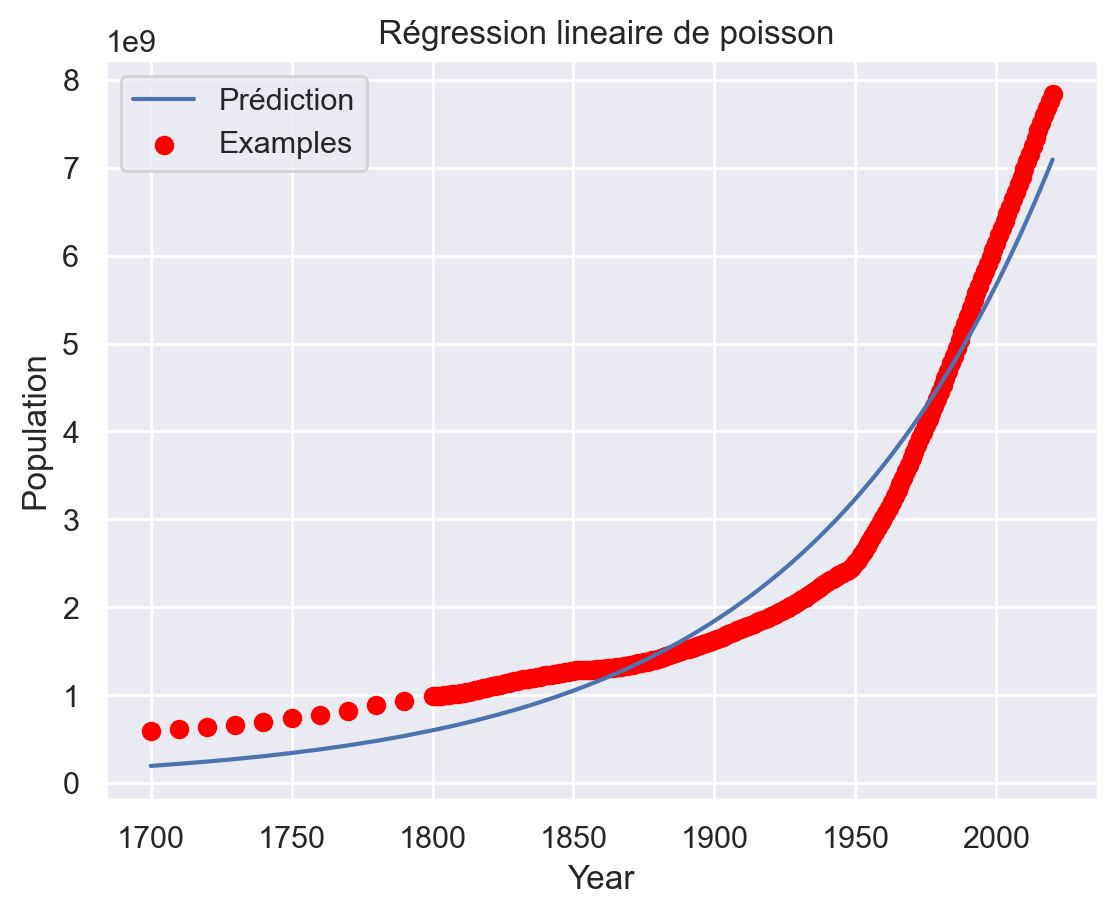

In [56]:
plt.plot(Years, preds, label="Prédiction")
plt.scatter(Years, Pop, label="Examples", color = 'red')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title(" Régression lineaire de poisson")
plt.legend()
plt.show()

Estimez la population mondiale pour les années 2050, 2100 et 2200. Commentez.

*Réponse :*
ceci semble peut probable qu'on monte a 53 milliard en 2200, je ne suis pas convaincu.

In [45]:
years_to_estimate = np.array([[2050], [2100], [2200]])
new_X =   np.concatenate((np.ones((years_to_estimate.shape[0], 1)), years_to_estimate), axis=1)
estimated_populations = poisson_hypothesis(Theta, new_X )

for i in range(len(years_to_estimate)):
    print(f"Estimation de la population pour l'année {int(years_to_estimate[i, 0])}: {int(estimated_populations[i, 0])}")


Estimation de la population pour l'année 2050: 9935903627
Estimation de la population pour l'année 2100: 17419738639
Estimation de la population pour l'année 2200: 53543920009


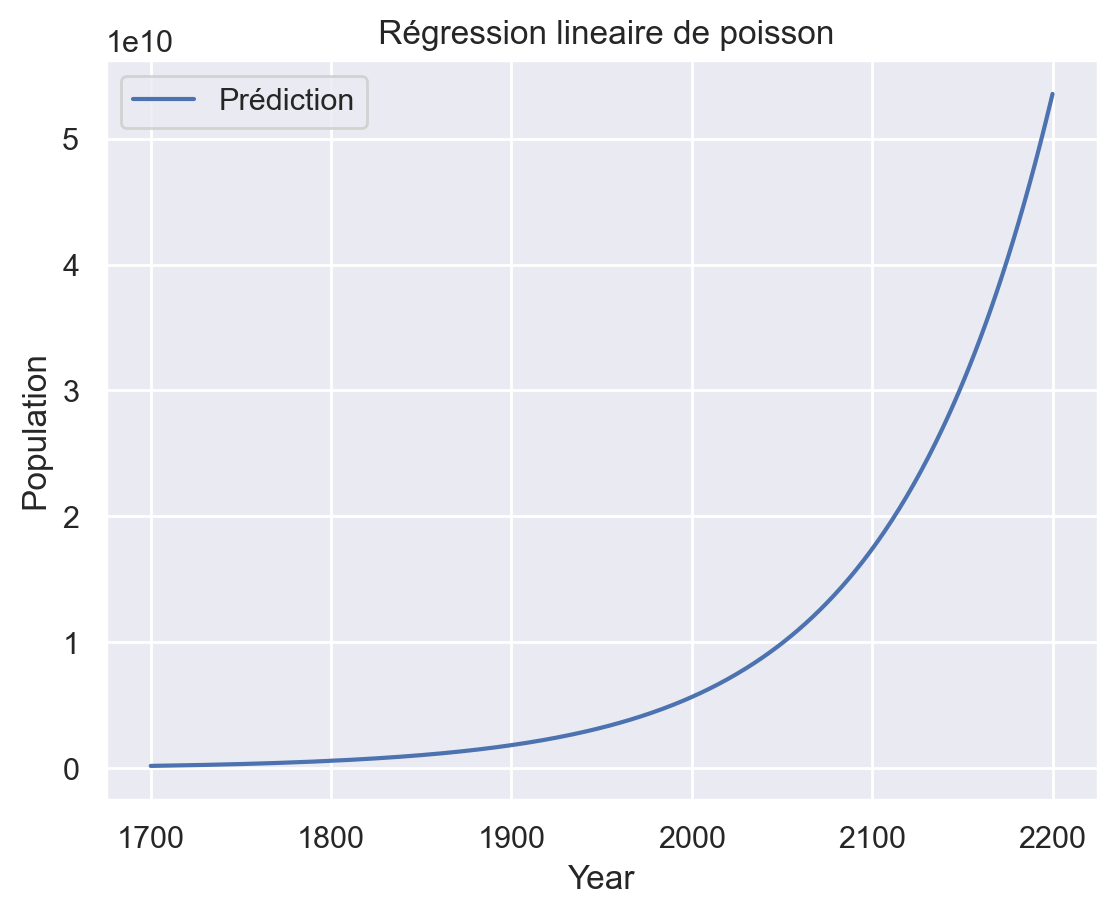

In [69]:
futur = np.array([[i] for i in range(2021, 2201)])
X_futur = np.concatenate((np.ones((futur.shape[0], 1)), futur), axis=1)

preds_futur = poisson_hypothesis(Theta, X_futur)

years=np.concatenate( (Years, futur), axis=0)
print ()
preds_futur = np.concatenate((preds, preds_futur), axis=0)

# Affichage des prédictions
plt.plot( years, preds_futur, label="Prédiction")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title(" Régression lineaire de poisson")
plt.legend()
plt.show()

## 3.3. Avec Scikit-learn

Faire la régression de Poisson à l'aide de `sklearn.linear_model.PoissonRegressor` en utilisant comme solver `newton-cholesky`. Affichez la valeurs de $\theta_0$ et de $\theta_1$, et de $r^2$.

In [30]:
data = get_world_population()
# 2D array: first column in the year, second column is the population
m, _ = data.shape

# On ne garde que les années >= 1700
select = [i for i in range(m) if data[i,0] >= 1700]
data = data[select, :]

# On split data en un vecteur colonne pour les années et un vecteur colonne pour la population.
Years = data[:, 0:1]
Pop = data[:, 1]

print(Years.shape)
print(Pop.shape)

(231, 1)
(231,)


In [31]:
from sklearn.linear_model import PoissonRegressor


model = PoissonRegressor(solver='newton-cholesky')
model.fit(Years, Pop)

predictions = model.predict(Years)

print(f"Theta_0: { model.intercept_ }")
print(f"Theta_1: { model.coef_ }")
print(f"R^2: { r2_score(Pop, predictions) }")

Theta_0: 1.6141448534076874
Theta_1: [0.01040156]
R^2: 0.9410156757764845
